In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
#!ls "/content/drive/My Drive/Web Mining Tut/Project/"
#%cd /content/drive/My\ Drive/Web Mining Tut/Project

In [2]:
import numpy as np
import pandas as pd
import re
import networkx as nx
from matplotlib import pyplot as plt

In [3]:
new_data = list(filter(None, [re.split(': |,', i.strip(': |,')) for i in open('data/dict.txt')]))
df = pd.DataFrame(new_data)
df.columns = ['match_id','player1', 'player2', 'player3', 'player4', 'player5', 'player6', 'player7', 'player8', 'player9', 'player10', 'timestamp']

In [4]:
df.head()
#len(df)

,match_id,player1,player2,player3,player4,player5,player6,player7,player8,player9,player10,timestamp
0,5845885766,MeO4_iw0cB-ttAgTITgShoV6dImQo4rV777d5dw32nY2rL...,-HR7l8xBDGP3dlarXQRFNC0cnY0nAXuDs19tkg706srZf...,lngkJ9ksKZekkoPGN6LbkwBBqmblYe2Tm2TxGIH_kOyDI...,PCD8bW8h250xaGkrmt653bNu_6AU0XbtaE8jbCk9iahQx...,ZXvpfO67bprK3u1-uorZzax6FdPsSoJ5bUd9M5saN2985...,hiV3q6CiVYKGTn121rI1YyBhSgxwBK9tAKy55_fAf8o0e...,mYh6ADgVGK2KjYRGpZkV8T8dd-8rSEHfDVZiLb4u6iMGa...,7Ml02P31iKinrGK6gjPCD31RNfCxrKqGAlrCUuTIjZRGM...,JdCOKEWx8jUHK-LCDvx-H6-trrJN9z3EnEzv-Lb3osOEs...,dQ36UZuepycXkzk8-2T3HeFUY6X9c8_Y3ojcTGV7GWnXc...,2022-04-28T17:36:26+00:00\n
1,5841618858,_3--XseBflvZRGosFiHnNJ5whIiX18G3SxttceO_GSWyvP...,1OmoyY3TquWvQj9BAVBhzSFlFIzuwqI6l2Kl05eE6fEVI...,3zQnK3QminFLKkPyQH7Bfr75Ra8XXRcnv9qpCrHlwil48...,EAHBBZJvMJ57KB61QFfcNkzA-KH-B5a6haX2rY1t3pC10...,gBBlYQwpLMDSpvl4aPrO-TmLzeRLiTeIRAl2yoA2wVjlg...,JdCOKEWx8jUHK-LCDvx-H6-trrJN9z3EnEzv-Lb3osOEs...,KDq1FPkcUgSnbKtssjWhQJvrTetjRr2HetaAs61njl3u3...,-Ru7879pVSrvCfA9Fk0jaWvk6W4yYByOF1y3ILPPkhF2j...,_wCbDPrywLmgU4I4yRF-IaLnN-C3ps4dcprzezpT44lr7...,_yS5DjAaU74J5TNQUi3JozAdYAFs-Vm6hBFA8fokq_V-Y...,2022-04-25T17:18:47+00:00\n
2,5841587153,iXxRgiKTP3NEkfhvwcqz_WArj2JDsulrP9I-ZYCSO7-hlQ...,ogxaFPJ5x5DoKet0_cUj0CSye6pjzfYkdtR4pXn-ESYz2...,vMqdmthROzP07DXJSr9jqQMRcTG2x6iSggvGGfDuBmdi3...,nR7g5tSKtqVAHwn2awot_YSNg3ejWY4H-H_b3AyRBGCqj...,ZblgOWCSVI9hW-1fGfHkGqSN2dEZS08Cwoe1p-caP0Vht...,oYiUWghzgQkjEuokUxzWd4W_hFQXxonPgU91BnOxzsNla...,0Hg0KOBIP_9thE3KJLr4LBdbvhYgpXLuDwISJBjOr0Nnb...,e96nztvuMVE95jpte_SF31Oe6afLO_cbnuhxuzgHg5KII...,JdCOKEWx8jUHK-LCDvx-H6-trrJN9z3EnEzv-Lb3osOEs...,r-w8vcIgcDPg_eDMQn-L4f8AyPFAhumx_2o4QSy_rM9Vr...,2022-04-25T17:05:34+00:00\n
3,5841653001,cpCgbyt3fScMiH6nXQK4JvUKJyQjAEHubtJuDmg-F2_bm2...,RExjdkvlFVP5O9OTRObFKBuA8i26BYjlBzBPwqjDb5KQy...,pMg0GcuDx7Xx0FgC7Xq6-UXfkcX3YWu-Np5u2f3J0wl6H...,QUXSUgl2ln_xpYS5xKrNs1tNkq7JvLw-C4sKnpov8YmM2...,T8GiTKk5wLX9hyejkdYSqKZG8_JKFest5j8ZpN4NtQkPw...,JdCOKEWx8jUHK-LCDvx-H6-trrJN9z3EnEzv-Lb3osOEs...,DNNN1WR9Os_DgX_BJmit9x4slZd-6aIQxJtvXpiSlh11K...,oYiUWghzgQkjEuokUxzWd4W_hFQXxonPgU91BnOxzsNla...,oyeQ7J2KSr6xiS5uBOWKN-zxcxL6N2MlFIMXzxGnnJSN_...,e96nztvuMVE95jpte_SF31Oe6afLO_cbnuhxuzgHg5KII...,2022-04-25T16:45:01+00:00\n
4,5840049805,VmMVzhU2EOOIOi9Hpn37Y1oGB_lxhdSXduaDOmVRsx27UF...,PpHNPURUHgjxxnFnqpwfiUu2qcrL0RJpr_D8EcwY6Lq2S...,coKk4yRnv2JMXU1-9NEs6yXiZknd9teaxh-65dtQ5YFXY...,JdCOKEWx8jUHK-LCDvx-H6-trrJN9z3EnEzv-Lb3osOEs...,eUEumIfKWMUv1nvtdHh5-QNgrVqCy1W2i1jCAXoDnKFeg...,JF-pBwuE2-_qATKbC94zFdgJ_k9gAvbDttN3RovIHi6g-...,75R7kWN5V2IvOmVorK8i2WmCh25i3KH6NxvM3IUJ4TgsW...,OgQ8uYEXvbBpAgA-2xrBHDq1tm1u8SSHPPJpfV20yzMa6...,k00dkvI5zilXFRjARmTWTUtWssiTC_slWi5w6Ec4p2SQC...,XMgqoOooLzIgvwui1hKiKPnAhNqH0inD3UYTX8ZQSWpUi...,2022-04-24T18:21:44+00:00\n


In [5]:
df.isnull().sum()

match_id       0
player1        0
player2        0
player3       67
player4      108
player5      111
player6      118
player7      120
player8      152
player9      154
player10     166
timestamp    167
dtype: int64

In [6]:
df.sort_values(by="match_id", ascending=False)

,match_id,player1,player2,player3,player4,player5,player6,player7,player8,player9,player10,timestamp
8151,5846695642,ayMeZxjaKrYYNLMdt4V9qGrm2B1q_LhJH9fzcx4eRiSvTt...,SDHGBv9QY200EcbEr8y98RJOGokUa3vcrf8tZp0JHRuML...,04jbW8Qpax5NmsiqYjrRvyK-0xY44FJlVgBMyQo6L8mlJ...,qRqPb06YFcHsIDFNC0TNQxAXPCMj-KrpWtV0qZNDausuK...,AGkbKJ96UIBxRMqDOshtrwnNcwcavjLqVFjZaV8owzS88...,OQRn3Y-DuanqLbnrvu_I9a9Wv3F4ep_xcXj68mLFr6MOQ...,W0_a_Ol3tp5ZesmeuIfvLgAWaxy6S_2LYwbGuKZZGZabs...,dKpS952_v9LnHEfK1Pq-YC8k_JPHwhso9h3ETuMeVzUs7...,czcqOPNiErLZbEnp2dIFqfiwlXkNJ45HN5SLSv49a6mv1...,B9NtYHPO2zck5n4v2tHMtlZS1psV9zOXvqTvVbY5u96AJ...,2022-04-28T21:25:32+00:00\n
6262,5846684351,gKDpezqtByS-MvjD7LXCsbq6qrxcPJMyUBOnBVn7Cj5pEe...,Ef9NbARPC5GjYe1anR7SkEBc0kIOIHuTT8oTZoeJWbmsl...,tR_gHUNMh1oIiIsWyQP1SVszswRxLjZCqB2Z9zLT7i1uO...,x-QcJf6YR0b05T_OX8bi-Zqvb2V_E0GCJx4x9kDvxHQ1m...,pmecpq8gnqJKejzk8wm4R1F8XOKV2EtMBdpwirb8x0N6I...,ttJ5KgXZNUHcNgCTbP8mR1dc4n9iAKAtAPqS3jMCHgiv_...,cQ1MdfivwPUCMgDu93qEOYbVpejOQtdbD3AN5dDtqFuvd...,5QFikmLVpBHvk7TNA7zytod3lxjrbT1Q6u6MDa1oSYnAX...,Hjo-lVDpBWp0WGfKJAiuPy9Hpo-uXlZ6fZHlM9wA7WVmn...,ffDj958Z7Vls3zbUhIKVXvsQ--NvIrL49CKmTOWTnekBR...,2022-04-28T21:20:30+00:00\n
7746,5846682981,UwFK4bBsgaoGE4LP8ssYabDIKwMdUUrQ-9t6ezJKAz_R1h...,DSJ63Hi2Qf7t9KiCMVHFnHUIVe_6qou9Ck6ziyhdEq3ZN...,BKrtP1LtLkQghLauMo1Go-fJNxw9ZvGyhMdq6O6PWG13j...,8IjD8Snct1T8ZmcMWRnKo7E_DUXPwo0KKEuCJKxSxiimB...,V2RvuD8VM7Fg-a7_O8WbaGVWNBa6VrENr1pByVtP7kQcZ...,WKeNi4pjvayPQg4iMasmR1GlwYcVj1k8qMiF1Lh5x-lPE...,UcIcrCV5BT-d2dactEozgPGisBBfwAYtRNJOHcAKMlc99...,YRKQz2vzht8p3GOuJqPIu_V6-spO13dGIORHLpzvO2oAI...,u-nwcmlCQWXVj2a6Xry4el1AQBYvidAta8sLsPbE_uQ4e...,bNhIuPW0g0wJwKM0bQ1cqvwxti7WUNitgU0iP7MInZKnj...,2022-04-28T21:12:26+00:00\n
7660,5846667593,MemopRdMboDdZeNF4hOOOMKZLpemrJWtaRlpixQwgLqa22...,88IOsipw2MkDtFq_gBinciLoNmm0CK4Zm-7iFd_QTrbJk...,ESsUjHC6151fcUdyEky26ccsHdhDbnOJBlaz2MtJt-z_6...,cxZMdpTzNNsNmP86Q-ycxeiYx7yY2EiivvtVf1Vahy3q8...,sKROSy28CQK_PSuWYVpZLgmvO2Og3Ia13uug7whKlbgF_...,pQu71hxoDrHwWpoMJI1sSu5r3fTKtKVLwr8wQ8SXa18Lq...,qdjBz1WEGblAOdBYLfAmpzTCRAtIBi-0Qt2DWzACR4-Tn...,FCldbiM4gQJ22lglpBS-YRXumn3nZk3FrLagul_8NCk-d...,CNUDvVJ7oReA9eRYBPzazORobVLFGfIVz6Va1z37urFMd...,hPFVt17uLgfZ18ToXb0hJVBahOia2BCOenDNeBJp8FWAK...,2022-04-28T21:34:05+00:00\n
7789,5846666710,3UzgyDt1yoU8vIq9xXIcrk3HmfMfn-AwkyPbYEHA3ZHSoT...,eLvqtkPgpP44K60YmyfF-ZCJbDyzmfmKWc1ADXeYBYoR-...,W0o41ZMeYX99gY04BfkyXpMK_0NCtdkGh-X8OkOMUeyTv...,Jeu1Hq2j-YJY4MXY4bkXbM9z2tu1CNHQ9y9ujb48dwfRp...,JIDjwsDYtP10augnhKT317c7OiN1AIQ1V1SCsb_Sq9JZt...,b830_VDjOFmosQdQ-SaTFHObkPRjT9wyC7-nrth5ebj7R...,l1MJaLpKqlwTjawAt6oSZB-4--66EOpyuhJJ7RiySwtmd...,HAa44lRgNkUpFoGzXfjZ98BXSKEHeaoQqQEAzNhvtfEqt...,nNOljaBpvYX5tnLPfB_V47pvg09VMvWogARTtfc6P-smu...,UZCQkF40nrSBC47btZnml15tuIpLZSk2IOMna0tgyatuI...,2022-04-28T21:31:29+00:00\n
...,...,...,...,...,...,...,...,...,...,...,...,...
4613,5657588390,ZJ5YFpKlxrcAzx2mqcZunuOoH0Y1hUY3JJBOwrJNsMvACj...,sPkkIdJ20KkvGaBejj_7IiMV01sflBIOwzymc6vPNaO8M...,7JyeOTmIdVEGIVuPe3hXZ2FT4RMNNLylxFEWxr3zlPvt7...,VkRLkTVJN8DNiJmWpwnDsSiHwarRt35tbA1SFTEz3IqWN...,zRaXJUWCymNlmwvRyzEpcU2yJKQryFBpKvf3oU3QgvC26...,KEz7gG7VWC8yd0jjQhUgdtf8Itu9MjUa5f6Uav0rqJMnf...,DO1w_3G793UwTVnNALGfWdtcTbO_BXbi9_b83q2pJj9xN...,ds47mQ6dpXX_HTOWANMoeSEGuwf4aW8JvkMPreHnfmM6p...,dGAqxkASPB6UPCNzzyyFu1IyLqOWIstgbNR03DAqLUALS...,ry2haukSXuo98Ogtj3Rr9Nc4pWCiDLls6dYM-EpQwsQTs...,2022-01-09T16:07:57+00:00\n
4614,5657498220,yCiS3nvkbaaug6O8uctVvx8We91-IX3WeiR8gx0SbJWw6m...,VkRLkTVJN8DNiJmWpwnDsSiHwarRt35tbA1SFTEz3IqWN...,7JyeOTmIdVEGIVuPe3hXZ2FT4RMNNLylxFEWxr3zlPvt7...,rbJBRaYnc0ozuSba3EDF_uMbhrqMtDcLaMVIidS6XBa46...,zRaXJUWCymNlmwvRyzEpcU2yJKQryFBpKvf3oU3QgvC26...,kq__z-g2vCIm5Kti1AWK00W_RABYJMYZK_sQZFyRqwsjS...,dswswj6cmIP9r9J1BwNpgMyKnjjgcaiLfrUjgFvXVarfO...,rugzWp6GVwAG79kV7cBwjJVsD99ZeCmhR3NSb0uW_YqgE...,WPaCDtlQMydhDTHDTzd0BZrhBaIBBgERt0iuevm5yLmYE...,YLJyMFHutI4dSuiNbTrewL_4yU4JnUX5_odhtegN3-n0P...,2022-01-09T15:24:17+00:00\n
4615,5655657074,VkRLkTVJN8DNiJmWpwnDsSiHwarRt35tbA1SFTEz3IqWNY...,zRaXJUWCymNlmwvRyzEpcU2yJKQryFBpKvf3

In [7]:
df_melted= (df.melt(['match_id', 'timestamp'], 
                       var_name='player_number',
                       value_name='player_puuid'))

In [8]:
df_melted.head()
#len(df_melted)

,match_id,timestamp,player_number,player_puuid
0,5845885766,2022-04-28T17:36:26+00:00\n,player1,MeO4_iw0cB-ttAgTITgShoV6dImQo4rV777d5dw32nY2rL...
1,5841618858,2022-04-25T17:18:47+00:00\n,player1,_3--XseBflvZRGosFiHnNJ5whIiX18G3SxttceO_GSWyvP...
2,5841587153,2022-04-25T17:05:34+00:00\n,player1,iXxRgiKTP3NEkfhvwcqz_WArj2JDsulrP9I-ZYCSO7-hlQ...
3,5841653001,2022-04-25T16:45:01+00:00\n,player1,cpCgbyt3fScMiH6nXQK4JvUKJyQjAEHubtJuDmg-F2_bm2...
4,5840049805,2022-04-24T18:21:44+00:00\n,player1,VmMVzhU2EOOIOi9Hpn37Y1oGB_lxhdSXduaDOmVRsx27UF...


In [9]:
df_melted.isnull().sum()

match_id            0
timestamp        1670
player_number       0
player_puuid      996
dtype: int64

In [10]:
# group players
players = df_melted.groupby('player_puuid').count().sort_values(by="match_id", ascending=False)
players.head()

,match_id,timestamp,player_number
player_puuid,,,
BOT,363,291,363
,67,0,67
JdCOKEWx8jUHK-LCDvx-H6-trrJN9z3EnEzv-Lb3osOEsJgXmHb_0RKApo08pSmyhgV323czEK_4jw,57,57,57
-HR7l8xBDGP3dlarXQRFNC0cnY0nAXuDs19tkg706srZf2ih2MgrIOfxc66pEm5QIBDZzGOeJsKBlQ,55,55,55
ZblgOWCSVI9hW-1fGfHkGqSN2dEZS08Cwoe1p-caP0VhtSFyKibEnH9cuf-iEEkLl8d1iqEcq_8tHA,54,54,54


To do:

*   get rid of \n at timestamp
*   get rid of empty cells (no timestamp, puuid)



In [11]:
G = nx.Graph()

for index, row in df.iterrows():
    for i in range(1, 11):
        for j in range(1, 11):
            if i != j:
                node_i = row["player" + str(i)]
                node_j = row["player" + str(j)]
                
                if(node_i is not None and node_j is not None and node_i != node_j):
                    if(G.has_edge(node_i, node_j)):
                        G[node_i][node_j]["weight"] = G[node_i][node_j]["weight"] + 1
                    else:
                        G.add_edge(node_i, node_j, weight=1)
    

In [12]:
print("The graph has " + str(len(G.nodes)) + " nodes and " + str(len(G.edges)) + " edges.")

The graph has 58802 nodes and 329353 edges.


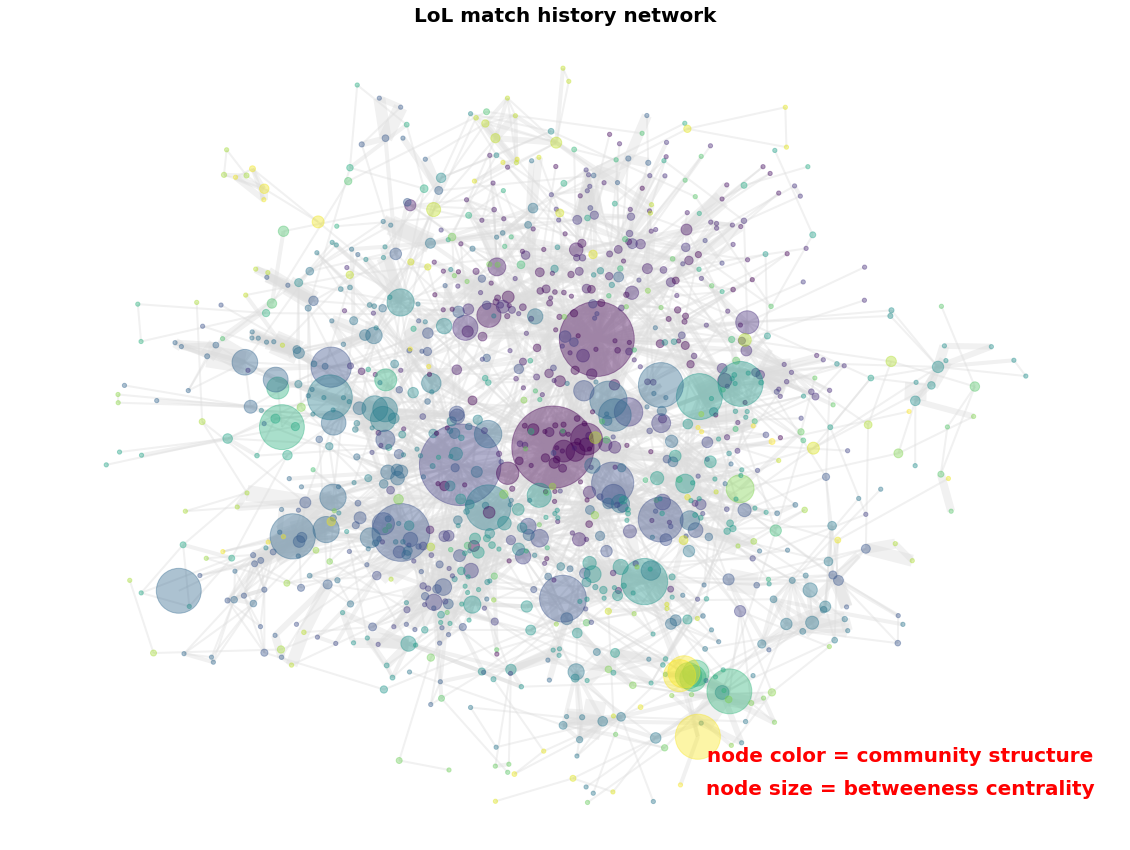

In [13]:
from random import sample

new_G = nx.Graph(G)

num_to_remove = int(len(new_G) / 2)
nodes = sample(list(new_G.nodes), num_to_remove)
new_G.remove_nodes_from(nodes)

# remove low-degree nodes
low_degree = [n for n, d in new_G.degree() if d < 10]
new_G.remove_nodes_from(low_degree)

# largest connected component
components = nx.connected_components(new_G)
largest_component = max(components, key=len)
H = new_G.subgraph(largest_component)

# compute centrality
centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx_nodes(
    H,
    pos=pos,
    node_color=node_color,
    node_size=node_size,
    alpha=0.4,
)

for edge in H.edges(data='weight'):
    nx.draw_networkx_edges(
        H,
        pos=pos,
        edgelist=[edge],
        width=edge[2],
        edge_color="gainsboro",
        alpha=0.4,
    )

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("LoL match history network", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
#fig.tight_layout()
plt.axis("off")
plt.savefig("graph_sampled.png")
plt.show()